# IMPORT LIBRARIES AND LOAD DATA

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
data = load_breast_cancer()

x = data.data
y = data.target
names = data.feature_names

In [3]:
df = pd.DataFrame(x, columns=names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# EXPLORATORY DATA ANALYSIS

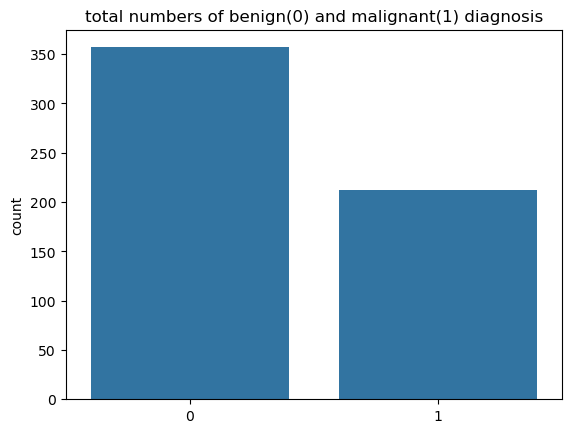

In [4]:
df_count = df['target'].value_counts()
df_count = pd.DataFrame(df_count)

sns.barplot(x=[0,1], y='count', data=df_count)
plt.title('total numbers of benign(0) and malignant(1) diagnosis')
plt.show()


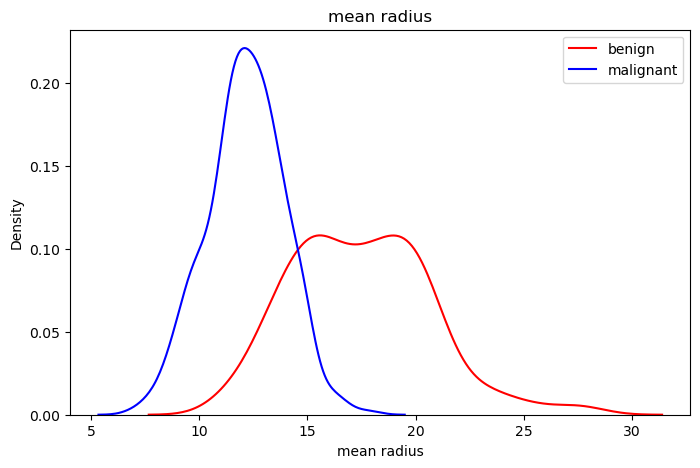

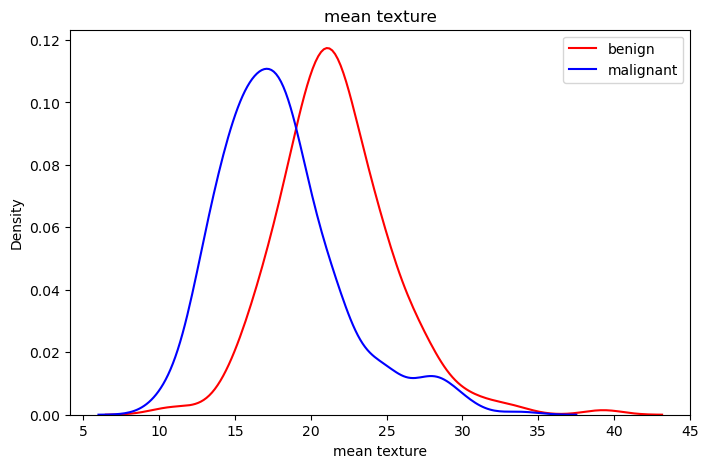

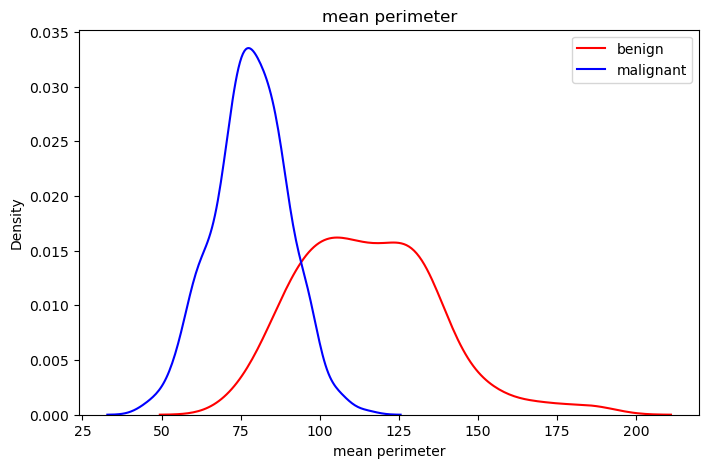

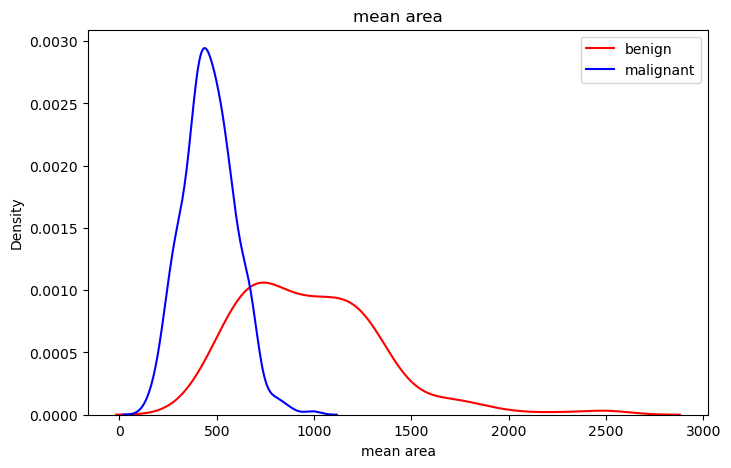

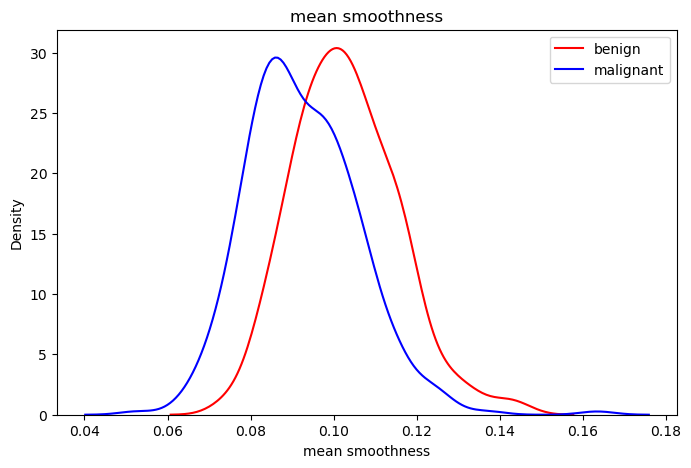

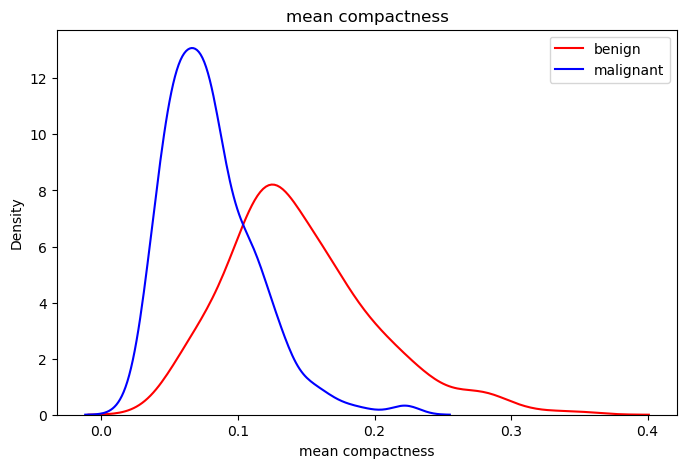

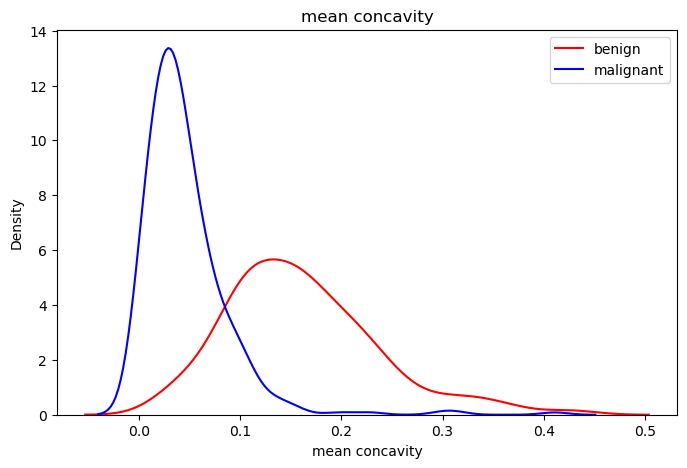

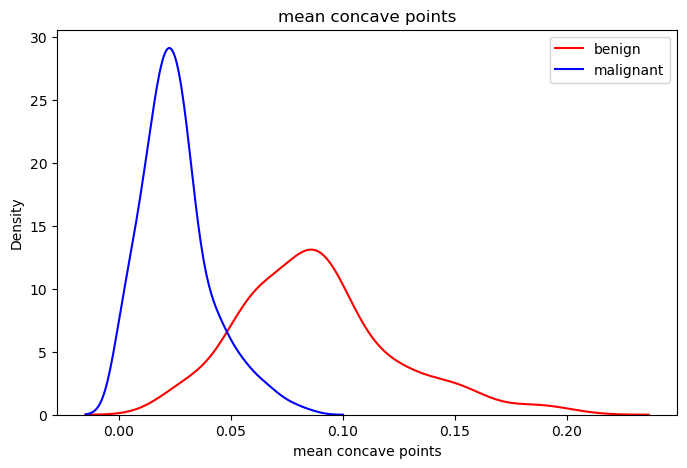

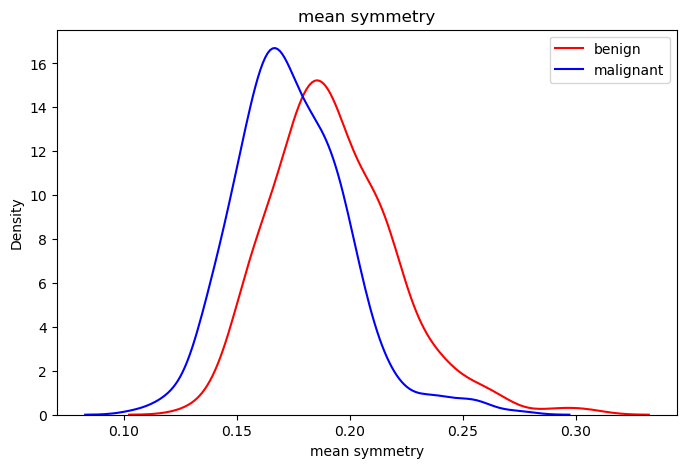

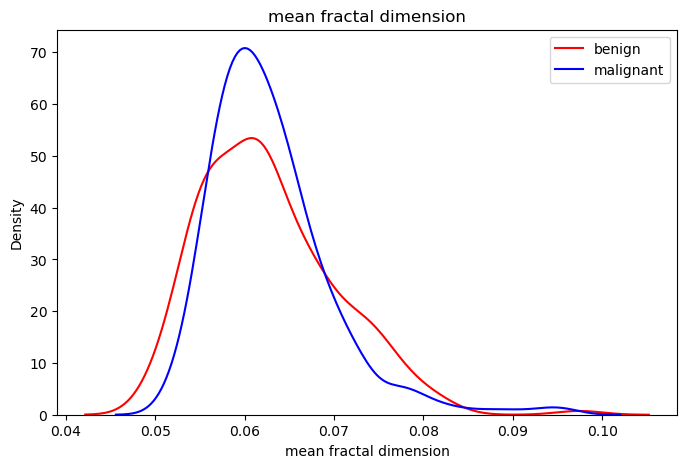

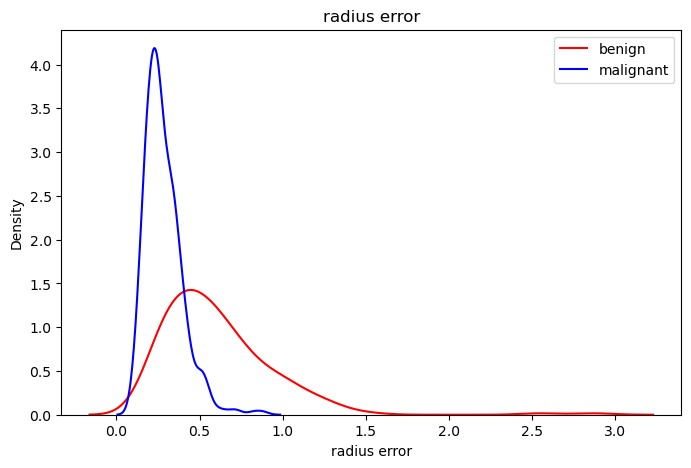

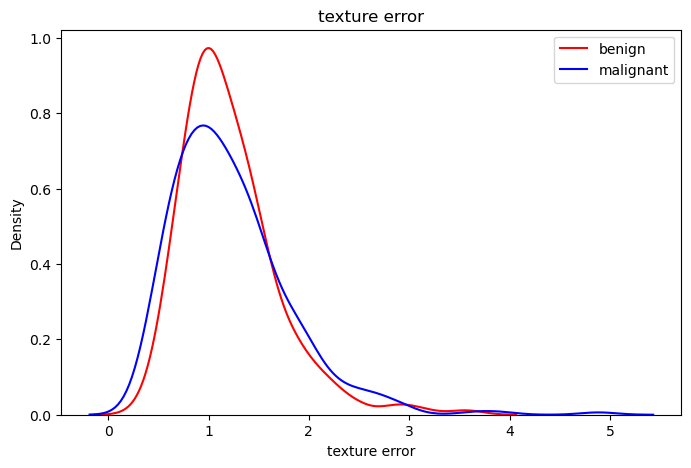

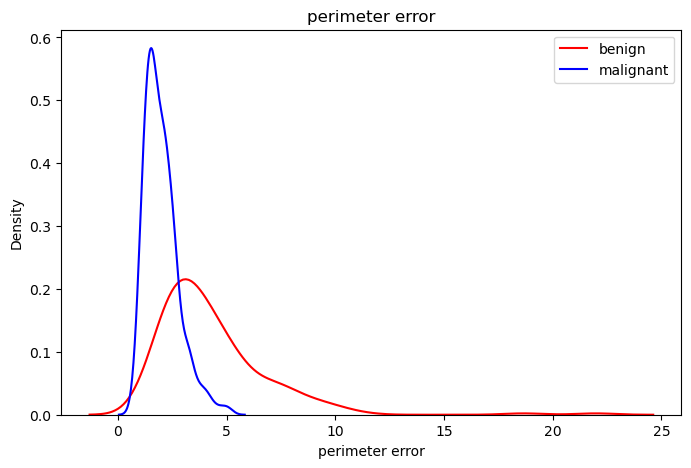

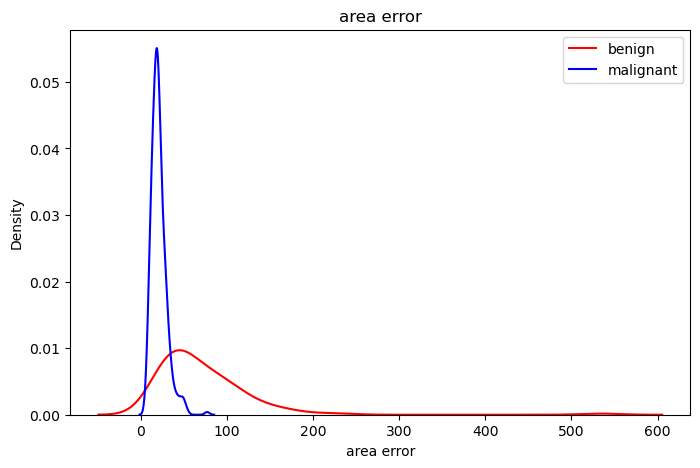

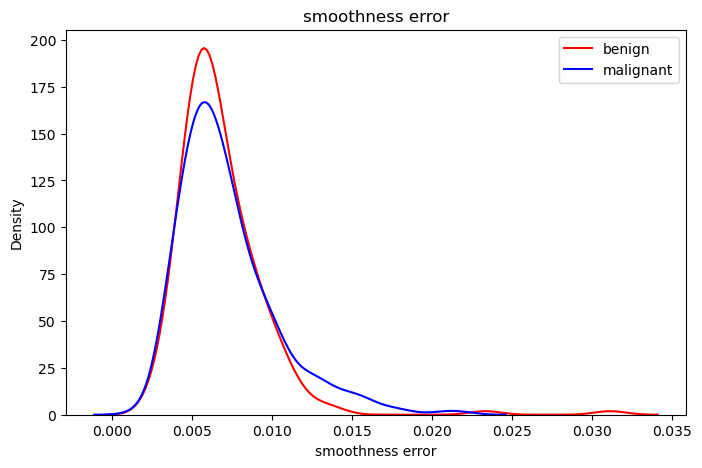

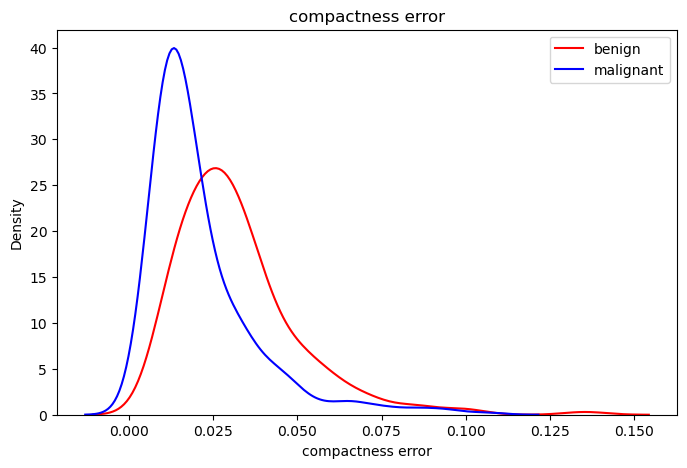

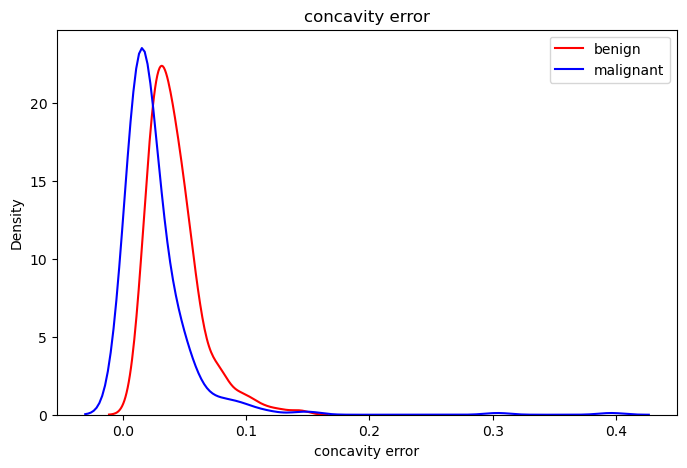

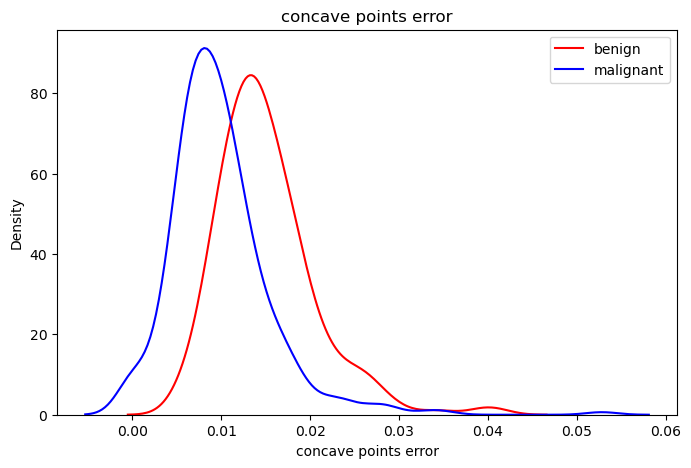

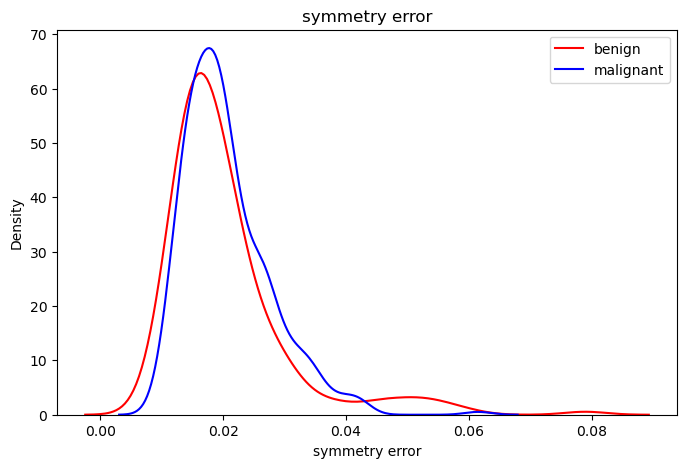

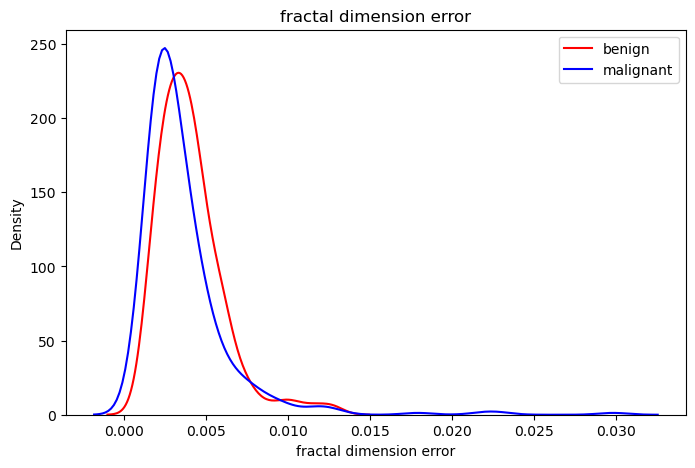

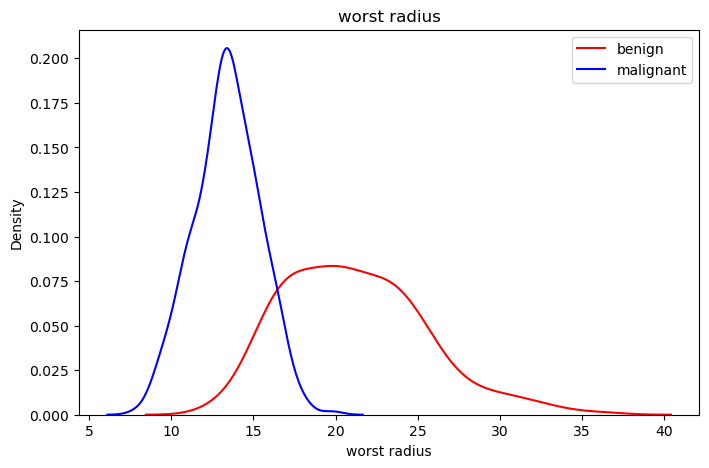

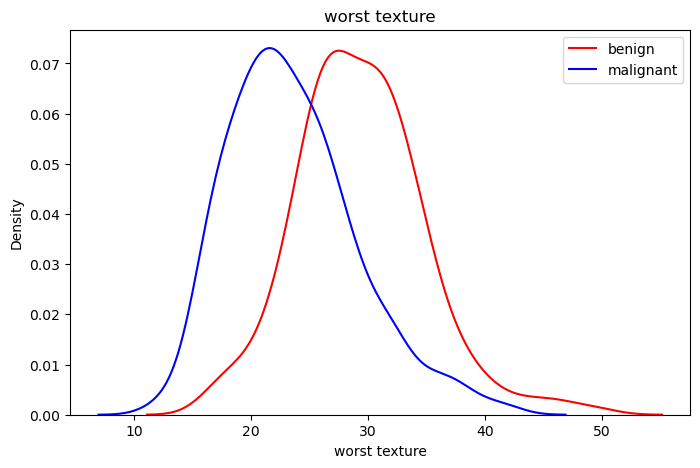

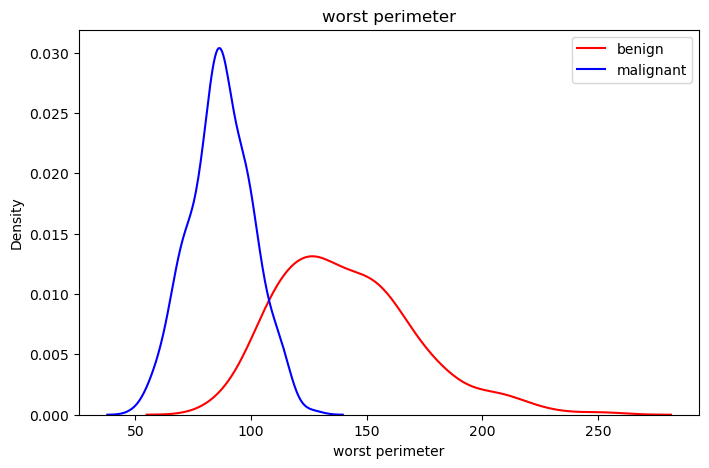

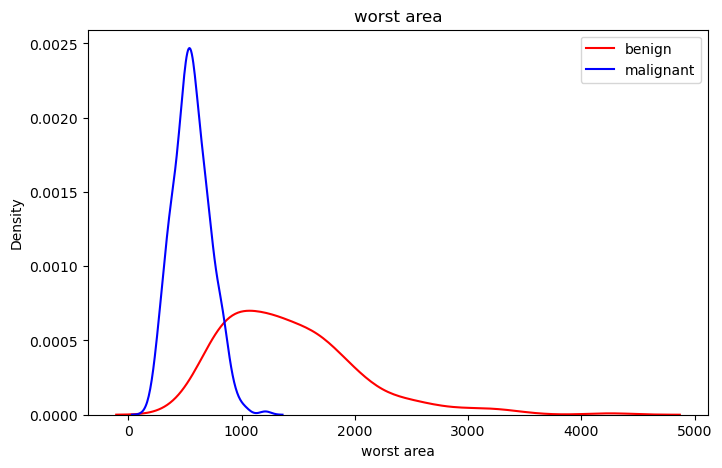

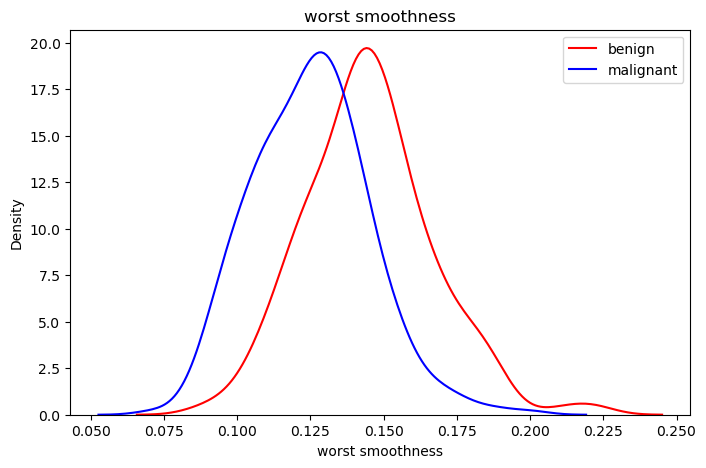

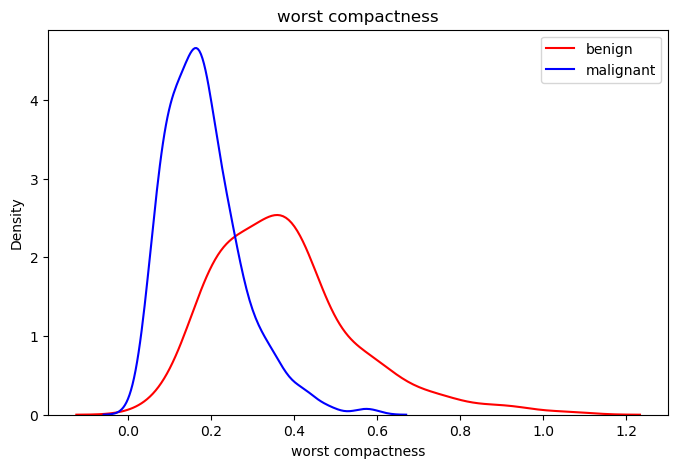

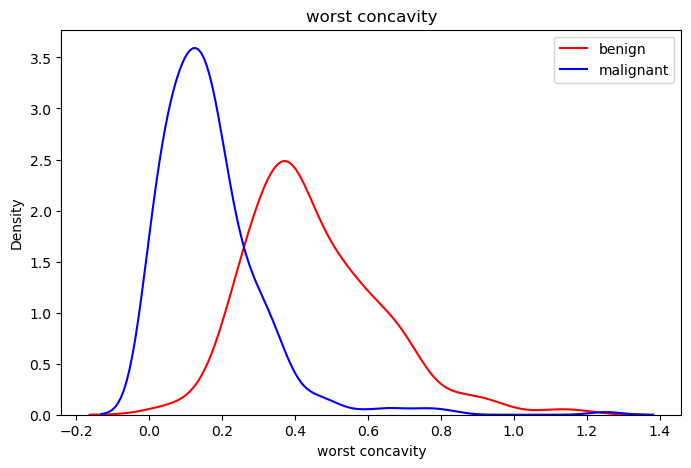

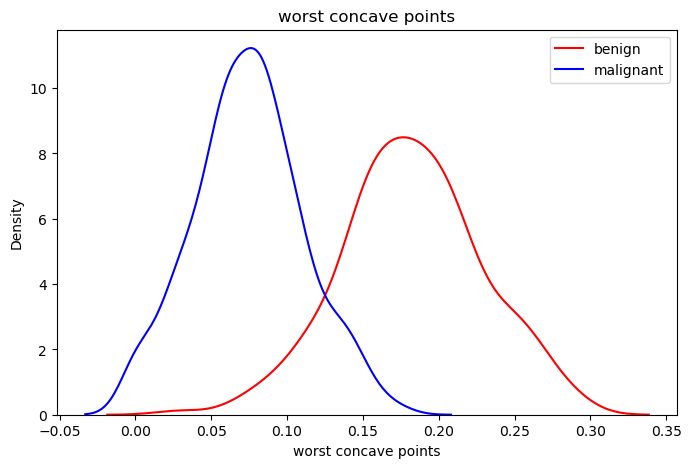

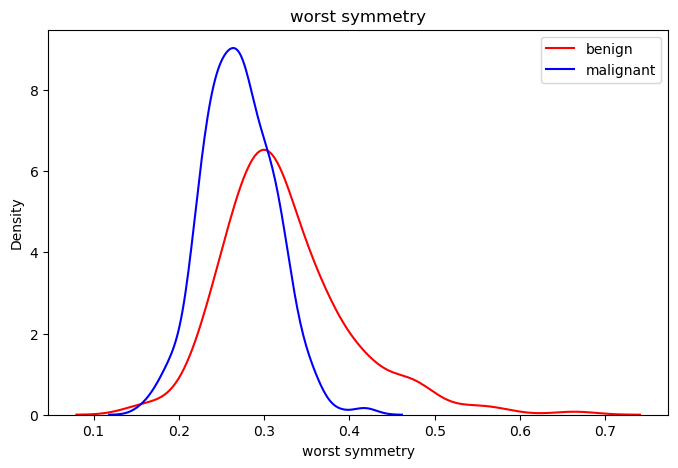

In [5]:
for i in list(df.columns[0:29]):
        
    benign_mr = df[i][df['target']==0]
    malignant_mr = df[i][df['target']==1]
    plt.figure(figsize=((8,5)))
    
    
    sns.kdeplot(benign_mr, label='benign', color='red')
    sns.kdeplot(malignant_mr, label='malignant', color='blue')
    plt.legend()
    plt.title(i)
    plt.show()

In [6]:
names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

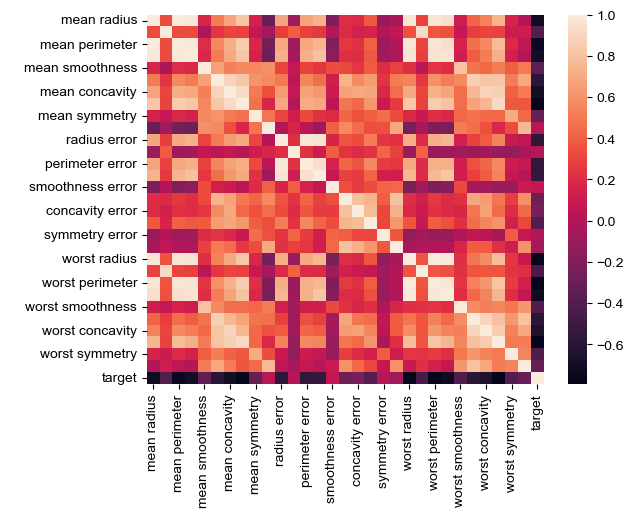

In [7]:
sns.heatmap(df.corr())
sns.set_style("whitegrid")
plt.show()

# DATA PREPROCESSING

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:,:-1])

x_train, x_test, y_train, y_test = train_test_split(x_scaled, df['target'], test_size=0.2, )



# MODEL TESTING AND SELECTION

In [9]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

param = [
    {'model': [LogisticRegression()]
    },
    {'model': [SVC()],
     'model__C': [0.1,1,10],
     'model__kernel': ['linear','rbf']
    },
    {'model': [RandomForestClassifier()],
     'model__n_estimators': [50,70,100]
    },
    {'model': [DecisionTreeClassifier()],
     'model__min_samples_split': [20,40,50]
    }]

best_model = GridSearchCV(pipe, param,cv=5, scoring='recall', verbose=2)
best_model.fit(x_train, y_train)
print(best_model.best_estimator_)
print(best_model.best_params_)
print(best_model.best_score_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END ....model=SVC(), model__C=0.1, model__kernel=linear; total time=   0.0s
[CV] END ....model=SVC(), model__C=0.1, model__kernel=linear; total time=   0.0s
[CV] END ....model=SVC(), model__C=0.1, model__kernel=linear; total time=   0.0s
[CV] END ....model=SVC(), model__C=0.1, model__kernel=linear; total time=   0.0s
[CV] END ....model=SVC(), model__C=0.1, model__kernel=linear; total time=   0.0s
[CV] END .......model=SVC(), model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END .......model=SVC(), model__C=0.1, model

# MODEL EVALUATION 

In [10]:
y_pred = best_model.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.96      0.98        75

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

